In [2]:
import numpy as np
import pandas as pd

In [3]:
#character-deaths.csv
test = pd.read_csv(r"D:\data mining\HW1\character-deaths.csv")
#把空值以0替代
test = test.fillna(0)

In [4]:
#Death Chapter將有數值的轉成1
Death_Chapter = test['Death Chapter']
for i in range (len(Death_Chapter)):
    if Death_Chapter[i]>1:
        Death_Chapter[i]=1

D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [5]:
#將Allegiances轉成dummy特徵
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
test['Allegiances'] = label_encoder.fit_transform(test["Allegiances"])

In [6]:
test['Allegiances']

0      12
1      15
2       9
3       5
4      12
5       1
6      14
7      15
8       5
9      14
10      5
11      9
12     14
13     15
14      0
15     14
16      8
17     11
18      1
19      1
20     15
21     11
22      1
23     14
24      8
25     19
26      1
27     12
28     16
29     16
       ..
887    12
888    20
889    18
890    14
891     5
892    20
893     8
894    15
895    16
896    16
897    16
898    16
899    14
900    15
901    15
902     9
903    15
904     2
905    20
906     2
907     0
908    14
909    14
910     9
911    16
912    15
913    15
914    15
915    20
916    19
Name: Allegiances, Length: 917, dtype: int32

In [7]:
#亂數拆成訓練集(75%)與測試集(25%) 
from sklearn.model_selection import train_test_split
x=test[['Allegiances','Gender','Nobility','SoS','DwD']]  #無'Nobility':0.64 #無'Book Intro Chapter':0.66 #'Allegiances','Gender','Nobility','SoS':0.66
y=test[['Death Chapter']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.75,random_state=777)

In [41]:
#標準化 :為了避免偏向某個變數去做訓練
from sklearn.preprocessing  import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_nor=sc.transform(x_train)
x_test_nor=sc.transform(x_test)

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
# 建立分類器
tree1=DecisionTreeClassifier(criterion='gini',max_depth=5) #度量使用gini 樹高5
tree_clf=tree1.fit(x_train_nor,y_train)
# 預測
y_test_predicted = tree_clf.predict(x_test_nor)
print(y_test_predicted)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.

In [43]:
accuracy = metrics.accuracy_score(y_test, y_test_predicted)
print('準確率:',accuracy)

準確率: 0.6700581395348837


In [44]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_predicted)

array([[444,  12],
       [215,  17]], dtype=int64)

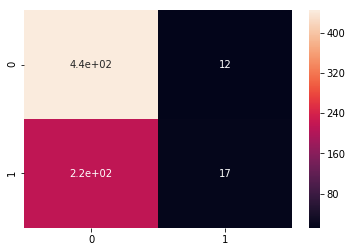

In [45]:
#對 confusion_matrix 進行可視化
import seaborn as sn
sn.heatmap(confusion_matrix(y_test, y_test_predicted), annot=True)

In [46]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_predicted)

0.6700581395348837

In [47]:
#Precision
from sklearn import metrics
metrics.precision_score(y_test, y_test_predicted, average='micro')

0.6700581395348837

In [48]:
#Recall
metrics.recall_score(y_test, y_test_predicted, average='micro')

0.6700581395348837

In [49]:
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(tree_clf,out_file=None,feature_names=['Allegiances','Gender','Nobility','SoS','DwD'],class_names=["Yes", "No"],filled=True, rounded=True, leaves_parallel=True)
graph = graphviz.Source(dot_data)

In [50]:
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(tree_clf, out_file=f)